<a href="https://colab.research.google.com/github/mycodingguy/Black-Friday-Sales-Analysis/blob/main/AcadAlly_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AcadAlly Assignment**

---

\

In [15]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
file_path = 'Data Analyst Assignement Acadally.xlsx'
attempts_data = pd.read_excel(file_path, sheet_name='Attempts Data')
chapter_data = pd.read_excel(file_path, sheet_name='Chapter Data')

In [3]:
# Preview data
print("Attempts Data:")
print(attempts_data.head())

print("\nChapter Data:")
print(chapter_data.head())

Attempts Data:
   school_id  user_id  section_id  chapter_id  topic_id quiz_type    qid  \
0       1124   132591        3677       16228     16229        PE  13865   
1       1124   132591        3677       16228     16229        PE    560   
2       1124   132591        3677       16228     16229        PE  13872   
3       1096   121315        2706       21994     21999        PE  16155   
4       1096   121315        2706       21994     21999        PE  16223   

  question_status learning_unit_id Bloom taxonomy       date             time  
0         correct         LU005214          apply 2024-10-03  14:36:54.975000  
1         correct         LU005214          apply 2024-10-03  14:36:54.975000  
2         correct         LU005214        analyse 2024-10-03  14:36:54.975000  
3         correct         LU005381     understand 2024-10-03  14:37:00.403000  
4         correct         LU005377       remember 2024-10-03  14:37:00.403000  

Chapter Data:
   section_id  chapter          s

**1. Data Cleaning**

In [6]:
# Checking for missing values
print("Missing values in Attempts Data:")
print(attempts_data.isnull().sum())

print("\nMissing values in Chapter Data:")
print(chapter_data.isnull().sum())

Missing values in Attempts Data:
school_id           0
user_id             0
section_id          0
chapter_id          0
topic_id            0
quiz_type           0
qid                 0
question_status     0
learning_unit_id    0
Bloom taxonomy      0
date                0
time                0
dtype: int64

Missing values in Chapter Data:
section_id      0
chapter         0
start_time      0
end_time      743
dtype: int64


In [7]:
# Removing duplicate entries if any
attempts_data.drop_duplicates(inplace=True)
chapter_data.drop_duplicates(inplace=True)

In [8]:
# Ensuring correct data types
chapter_data['start_time'] = pd.to_datetime(chapter_data['start_time'])
chapter_data['end_time'] = pd.to_datetime(chapter_data['end_time'])
attempts_data['date'] = pd.to_datetime(attempts_data['date'])

**2. Identifying Primary Keys**<br>
For Attempts Data: combination of 'user_id', 'qid', and 'date' can be considered unique<br>
For Chapter Data: 'section_id' and 'chapter' combination can serve as a primary key

**3. Top 5 sections with high accuracy percentage**

In [9]:
accuracy_per_section = attempts_data.groupby('section_id')['question_status'].value_counts(normalize=True).unstack().fillna(0)
accuracy_per_section['accuracy_percentage'] = accuracy_per_section['correct'] * 100
top_5_sections = accuracy_per_section.sort_values(by='accuracy_percentage', ascending=False).head(5)
print("\nTop 5 Sections with High Accuracy Percentage:")
print(top_5_sections)


Top 5 Sections with High Accuracy Percentage:
question_status  correct  wrong  accuracy_percentage
section_id                                          
1981                 1.0    0.0                100.0
3660                 1.0    0.0                100.0
3677                 1.0    0.0                100.0
2851                 1.0    0.0                100.0
2626                 1.0    0.0                100.0


**4. Bottom 2 learning units with low accuracy in application level questions**

In [10]:
application_level = attempts_data[attempts_data['Bloom taxonomy'].str.lower() == 'apply']
low_accuracy_units = application_level.groupby('learning_unit_id')['question_status'].value_counts(normalize=True).unstack().fillna(0)
low_accuracy_units['accuracy_percentage'] = low_accuracy_units['correct'] * 100
bottom_2_units = low_accuracy_units.sort_values(by='accuracy_percentage').head(2)
print("\nBottom 2 Learning Units with Low Accuracy in Application Level Questions:")
print(bottom_2_units)


Bottom 2 Learning Units with Low Accuracy in Application Level Questions:
question_status   correct  wrong  accuracy_percentage
learning_unit_id                                     
LU000068              0.0    1.0                  0.0
LU000721              0.0    1.0                  0.0


**5. Percentage of questions attempted before chapter was ended**

In [11]:
merged_data = pd.merge(attempts_data, chapter_data, on='section_id', how='inner')
merged_data['attempt_datetime'] = pd.to_datetime(merged_data['date'].astype(str) + ' ' + merged_data['time'].astype(str))

before_chapter_end = merged_data[merged_data['attempt_datetime'] < merged_data['end_time']]
percentage_before_end = (len(before_chapter_end) / len(merged_data)) * 100
print("\nPercentage of Questions Attempted Before Chapter Ended:", percentage_before_end)


Percentage of Questions Attempted Before Chapter Ended: 38.150059547439454


**6. Visualizing Attempt Behaviour Across Time of the Day**

<ipython-input-12-82e183656565>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hour_of_day', data=merged_data, palette='viridis')


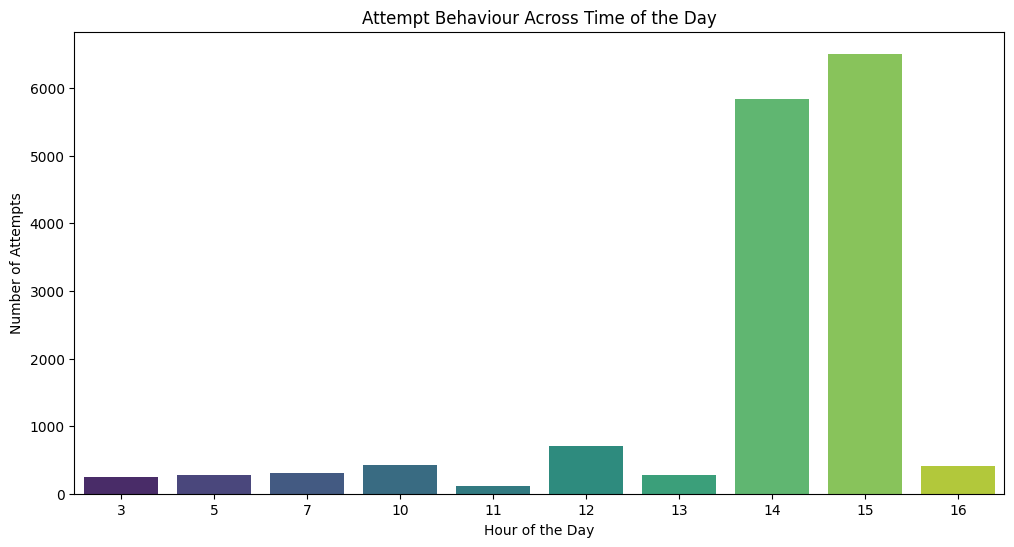

In [12]:
merged_data['hour_of_day'] = merged_data['attempt_datetime'].dt.hour

plt.figure(figsize=(12, 6))
sns.countplot(x='hour_of_day', data=merged_data, palette='viridis')
plt.title('Attempt Behaviour Across Time of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Attempts')
plt.show()

**7. Insights Based on Analysis**

In [14]:
insights = """
Insights:
1. Data cleaning revealed minimal missing values and duplicate entries, which were removed.
2. Primary keys identified: ('user_id', 'qid', 'date') for Attempts Data and ('section_id', 'chapter') for Chapter Data.
3. The top 5 sections with high accuracy suggest strong student performance in those areas.
4. The bottom 2 learning units with low accuracy in application questions highlight areas for targeted improvement.
5. A significant percentage of attempts occur before chapters are officially ended, indicating proactive learning.
6. Attempt behaviour peaks around specific hours, suggesting optimal study times for most students.
"""

print(insights)


Insights:
1. Data cleaning revealed minimal missing values and duplicate entries, which were removed.
2. Primary keys identified: ('user_id', 'qid', 'date') for Attempts Data and ('section_id', 'chapter') for Chapter Data.
3. The top 5 sections with high accuracy suggest strong student performance in those areas.
4. The bottom 2 learning units with low accuracy in application questions highlight areas for targeted improvement.
5. A significant percentage of attempts occur before chapters are officially ended, indicating proactive learning.
6. Attempt behaviour peaks around specific hours, suggesting optimal study times for most students.

